# 住宅価格の回帰

Week3で使用したアイオワ州エイムズ市の住宅価格データセットを使い、回帰問題を解く練習をします。


79種類の特徴量（説明変数）を活用し、住宅価格の数値を推測する問題が設定できます。こういった連続値のものを推測する問題を回帰問題と呼びます。


House Prices: Advanced Regression Techniques


## 今回使う手法の一覧
scikit-laernを使い以下の手法で学習と推定を行っていきます。それぞれの手法についての詳細は今の段階では扱いません。ライブラリを使えばどれも気軽に利用できることや、手法毎の結果に違いがあることを簡単に見ていきます。


- 線形回帰
- SVM
- 決定木
- ランダムフォレスト

分類問題と回帰問題の両方で使える手法と、そうではない手法が存在します。

# データセットの準備

Week3同様にKaggleからデータセットをダウンロードしてください。train.csvのみを使用します。

# 回帰問題の流れ

回帰問題の流れは分類問題と基本的には同じですから、課題1のように細かい説明は行いません。


## 練習のための準備
このデータセットには79種類の特徴量（目的変数）がありますが、Week3で探索して分かったように様々なタイプのデータ含まれています。これをどう前処理するかということは機械学習において重要な箇所ですが、今回は回帰問題の学習や評価の練習を優先するため、説GrLivAreaとYearBuiltの2つだけを利用することにします。


## 【問題1】練習のために特徴量の選択
データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出してください。

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
X_g = df.loc[:, ['GrLivArea']].values
X_y = df.loc[:, ['YearBuilt']].values

In [5]:
y = df.loc[:, ['SalePrice']].values

## 【問題2】線形回帰による推定と評価
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。


sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation


評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。


sklearn.metrics.mean_squared_error — scikit-learn 0.21.3 documentation


可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。

In [6]:
df.loc[:, ['GrLivArea', 'YearBuilt', 'SalePrice']].head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


In [7]:
df.loc[:, ['GrLivArea', 'YearBuilt', 'SalePrice']].describe()

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


それぞれ1460個のデータを持っている。
- SalePrice [ドル]　目的変数。不動産価格。
- GrLivArea[平方フィート]　地上階のリビングの広さ。
- YearBuilt[年]　建設された年。

SalePriceの値が他の2つの特徴量に比べて大きい。標準偏差も大きく、値にかなりのばらつきがあることが分かる。
YearBulitはその特徴量の性質上、標準偏差は小さい。

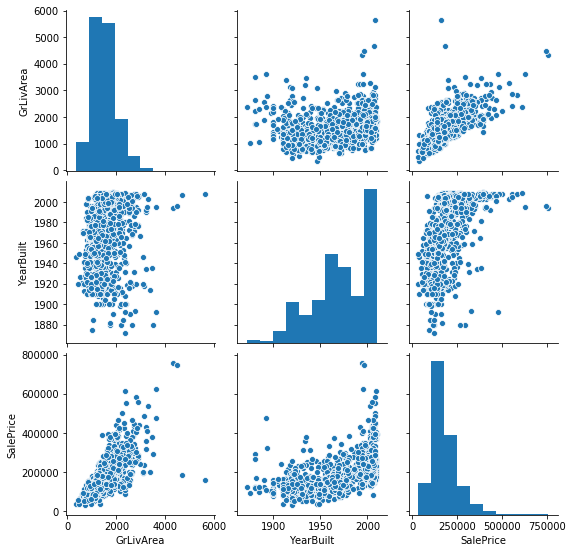

In [8]:
sns.pairplot(df.loc[:, ['GrLivArea', 'YearBuilt', 'SalePrice']])

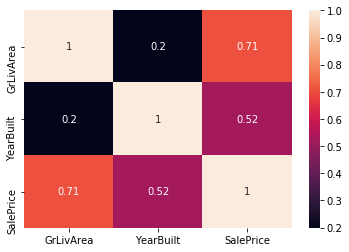

In [9]:
cm = np.corrcoef(df.loc[:, ['GrLivArea', 'YearBuilt', 'SalePrice']].values.T)
hm = sns.heatmap(cm, annot=True, yticklabels=['GrLivArea', 'YearBuilt', 'SalePrice'], xticklabels=['GrLivArea', 'YearBuilt', 'SalePrice'])
plt.show()

GrLivAreaとSalepriceの相関係数は0.71と高い値を示しており、散布図を見てもGrLivAreaとSalePriceの間に線形関係を見ることができるで、GrLivAreaは回帰分析に用いる説明変数として適しているといえる。

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
slr = LinearRegression()

In [11]:
#描画する関数
def lin_regplot(X, y, model):
    plt.scatter(X, y, edgecolor='white', s=20)
    model.fit(X, y)
    plt.plot(X, model.predict(X), color='black', lw=1)
    if X == 'X_g':
        plt.xlabel('GrLivArea[ft^2]')
    else:
        plt.xlabel('YearBuilt')
    plt.ylabel('SalePrice[$]')
    plt.show()

In [12]:
#線形回帰による学習と推定

#GrLivArea
slr.fit(X_g, y) #sklearnの回帰推定器の多くは標準化されてない変数に適応し、用途によってはこうした手法が適している。
y_pred = slr.predict(X_g)
y_pred

array([[201761.93968805],
       [153767.53887136],
       [209903.84696945],
       ...,
       [269254.06583652],
       [134055.55282165],
       [153124.75671756]])

In [13]:
#平均二乗誤差による評価

print('MSE: %.3f' % mean_squared_error(y, y_pred))

MSE: 3139843209.667


In [14]:
lr_g_score_df = pd.DataFrame([mean_squared_error(y, y_pred)], 
                          columns=['MSE'], 
                          index=[['lr'], ['GrLivArea']])

lr_g_score_df

,,MSE
lr,GrLivArea,3.139843e+09


C:\Users\Kei\anaconda3\envs\py_env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


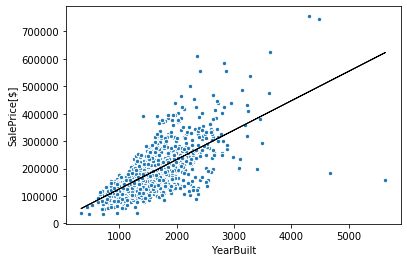

In [15]:
#可視化

lin_regplot(X_g, y, slr)

In [16]:
#線形回帰による学習と推定

#YearBuilt
slr.fit(X_y, y)
y_pred = slr.predict(X_y)
y_pred

array([[224564.81054524],
       [187429.72691094],
       [221814.06360936],
       ...,
       [139291.65553315],
       [151670.01674458],
       [172300.61876364]])

In [17]:
#平均二乗誤差による評価

print('MSE: %.3f' % mean_squared_error(y, y_pred))

MSE: 4582376228.726


In [18]:
lr_y_score_df = pd.DataFrame([mean_squared_error(y, y_pred)], 
                          columns=['MSE'], 
                          index=[['lr'], ['YearBuilt']])

lr_y_score_df

,,MSE
lr,YearBuilt,4.582376e+09


In [19]:
lr_score_df = pd.concat([lr_y_score_df, lr_g_score_df])
lr_score_df

MSE
lr YearBuilt  4.582376e+09
   GrLivArea  3.139843e+09

C:\Users\Kei\anaconda3\envs\py_env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


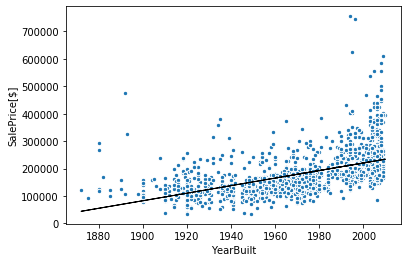

In [20]:
#可視化

lin_regplot(X_y, y, slr)

## 【問題3】手法の比較
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。


- 線形回帰
- SVM
- 決定木
- ランダムフォレスト

公式ドキュメントへのリンクは以下です。本来はパラメータチューニングを行いますが、まずはデフォルトの値で実行しましょう。


sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation
sklearn.svm.SVR — scikit-learn 0.21.3 documentation
sklearn.tree.DecisionTreeRegressor — scikit-learn 0.21.3 documentation
sklearn.ensemble.RandomForestRegressor — scikit-learn 0.21.3 documentation

SVM、決定木、ランダムフォレストは分類問題でも使用した手法ですが、回帰問題用のライブラリはそれぞれ専用のものに分かれています。

In [21]:
#SVM
from sklearn.svm import SVR
svr = SVR()

In [22]:
#GrLivArea
svr.fit(X_g, y)
y_pred = svr.predict(X_g)
y_pred

C:\Users\Kei\anaconda3\envs\py_env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([163141.54453999, 162752.8616377 , 163174.03913635, ...,
       163124.91812345, 162618.07375135, 162747.35726865])

In [23]:
svr_g_score_df = pd.DataFrame([mean_squared_error(y, y_pred)], 
                          columns=['MSE'], 
                          index=[['svr'], ['GrLivArea']])

svr_g_score_df

,,MSE
svr,GrLivArea,6.611032e+09


C:\Users\Kei\anaconda3\envs\py_env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kei\anaconda3\envs\py_env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


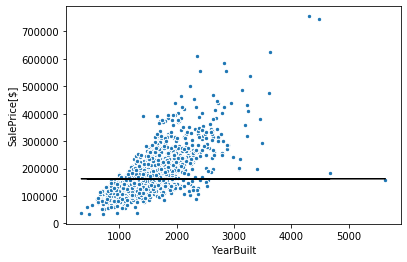

In [24]:
lin_regplot(X_g, y, svr)

In [25]:
#YearBuilt
svr.fit(X_y, y)
y_pred = svr.predict(X_y)
y_pred

C:\Users\Kei\anaconda3\envs\py_env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([163580.45535517, 163201.13593614, 163573.04853796, ...,
       162910.62932764, 162911.13816673, 163022.64374175])

In [26]:
svr_y_score_df = pd.DataFrame([mean_squared_error(y, y_pred)], 
                          columns=['MSE'], 
                          index=[['svr'], ['YearBuilt']])

svr_y_score_df

,,MSE
svr,YearBuilt,6.594531e+09


C:\Users\Kei\anaconda3\envs\py_env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kei\anaconda3\envs\py_env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


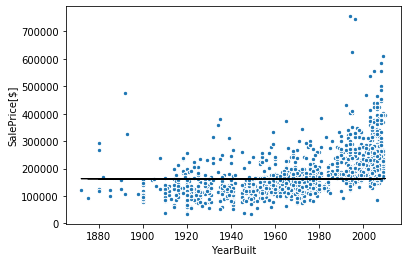

In [27]:
lin_regplot(X_y, y, svr)

In [28]:
#決定木
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

In [29]:
#GrLivArea
tree.fit(X_g, y)
y_pred = tree.predict(X_g)
y_pred

array([229580.4       , 183250.        , 219066.66666667, ...,
       266500.        , 146012.5       , 147500.        ])

In [30]:
tree_g_score_df = pd.DataFrame([mean_squared_error(y, y_pred)], 
                          columns=['MSE'], 
                          index=[['tree'], ['GrLivArea']])

tree_g_score_df

,,MSE
tree,GrLivArea,7.342972e+08


C:\Users\Kei\anaconda3\envs\py_env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


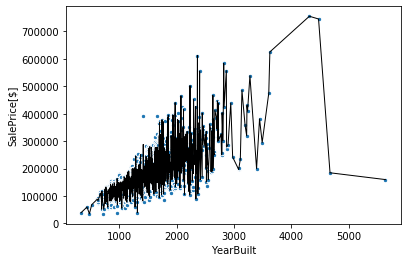

In [31]:
sort_idx = X_g.flatten().argsort()
lin_regplot(X_g[sort_idx], y[sort_idx], tree)

In [32]:
#YearBuilt
tree.fit(X_y, y)
y_pred = tree.predict(X_y)
y_pred

array([227408.57777778, 163831.96969697, 242630.        , ...,
       120900.        , 128036.25      , 153115.95833333])

In [33]:
tree_y_score_df = pd.DataFrame([mean_squared_error(y, y_pred)], 
                          columns=['MSE'], 
                          index=[['tree'], ['YearBuilt']])

tree_y_score_df

,,MSE
tree,YearBuilt,3.534330e+09


C:\Users\Kei\anaconda3\envs\py_env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


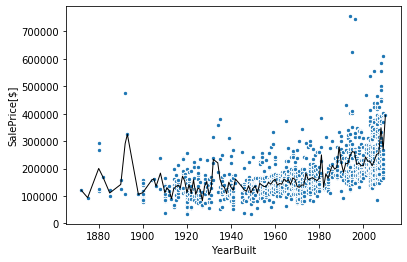

In [34]:
sort_idx = X_y.flatten().argsort()
lin_regplot(X_y[sort_idx], y[sort_idx], tree)

In [35]:
#ランダムフォレスト
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()

In [36]:
#GrLivArea
forest.fit(X_g, y)
y_pred = forest.predict(X_g)
y_pred

C:\Users\Kei\anaconda3\envs\py_env\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


array([231521.30594444, 178681.15      , 221266.78809524, ...,
       214312.8       , 137515.73333333, 142185.63975397])

In [37]:
forest_g_score_df = pd.DataFrame([mean_squared_error(y, y_pred)], 
                          columns=['MSE'], 
                          index=[['forest'], ['GrLivArea']])

forest_g_score_df

,,MSE
forest,GrLivArea,1.099591e+09


C:\Users\Kei\anaconda3\envs\py_env\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Kei\anaconda3\envs\py_env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


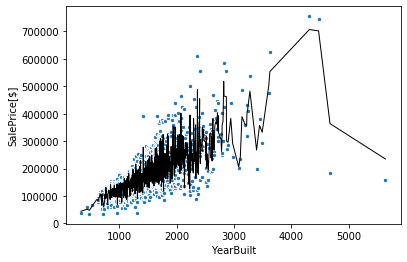

In [38]:
sort_idx = X_g.flatten().argsort()
lin_regplot(X_g[sort_idx], y[sort_idx], forest)

In [39]:
#YearBuilt
forest.fit(X_y, y)
y_pred = forest.predict(X_y)
y_pred

C:\Users\Kei\anaconda3\envs\py_env\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


array([228786.56288833, 163953.38690214, 242957.84153361, ...,
       120753.8443661 , 128325.14696553, 153786.67581908])

In [40]:
forest_y_score_df = pd.DataFrame([mean_squared_error(y, y_pred)], 
                          columns=['MSE'], 
                          index=[['forest'], ['YearBuilt']])

forest_y_score_df

,,MSE
forest,YearBuilt,3.539693e+09


C:\Users\Kei\anaconda3\envs\py_env\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Kei\anaconda3\envs\py_env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


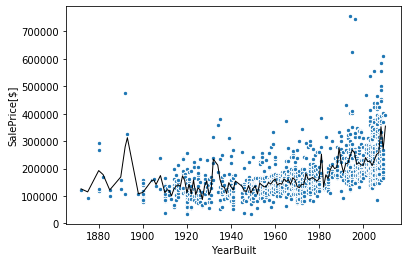

In [41]:
sort_idx = X_y.flatten().argsort()
lin_regplot(X_y[sort_idx], y[sort_idx], forest)

### 各手法の予測結果まとめ

In [44]:
score_df = pd.concat([lr_g_score_df, lr_y_score_df, 
                      svr_g_score_df, svr_y_score_df, 
                     tree_g_score_df, tree_y_score_df, 
                     forest_g_score_df, forest_y_score_df])

score_df

MSE
lr     GrLivArea  3.139843e+09
       YearBuilt  4.582376e+09
svr    GrLivArea  6.611032e+09
       YearBuilt  6.594531e+09
tree   GrLivArea  7.342972e+08
       YearBuilt  3.534330e+09
forest GrLivArea  1.099591e+09
       YearBuilt  3.539693e+09

C:\Users\Kei\anaconda3\envs\py_env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


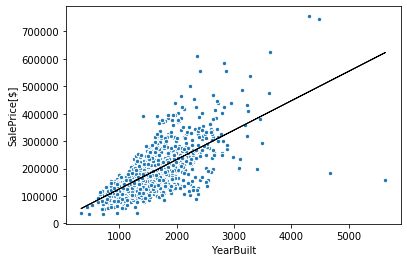

C:\Users\Kei\anaconda3\envs\py_env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


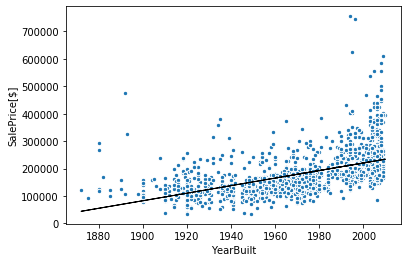

C:\Users\Kei\anaconda3\envs\py_env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kei\anaconda3\envs\py_env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


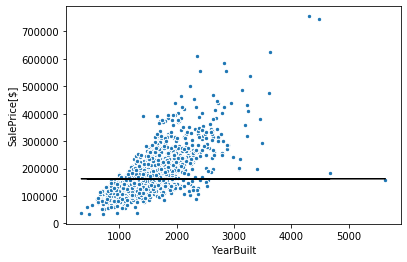

C:\Users\Kei\anaconda3\envs\py_env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kei\anaconda3\envs\py_env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


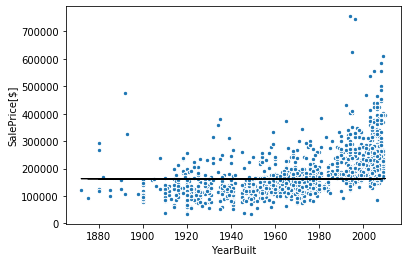

C:\Users\Kei\anaconda3\envs\py_env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


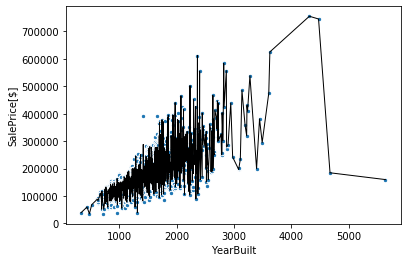

C:\Users\Kei\anaconda3\envs\py_env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


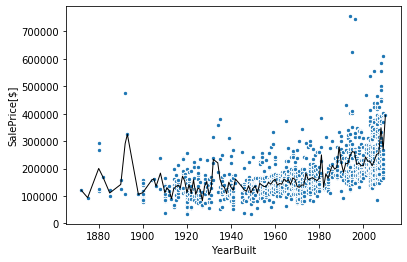

C:\Users\Kei\anaconda3\envs\py_env\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Kei\anaconda3\envs\py_env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


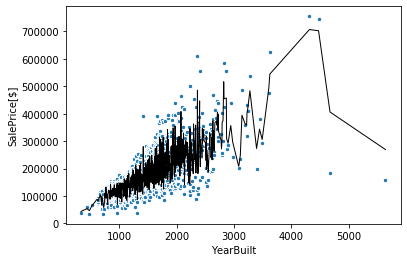

C:\Users\Kei\anaconda3\envs\py_env\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Kei\anaconda3\envs\py_env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


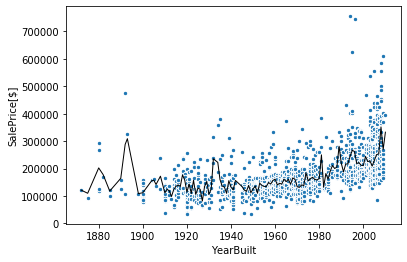

In [43]:
lin_regplot(X_g, y, slr)
lin_regplot(X_y, y, slr)
lin_regplot(X_g, y, svr)
lin_regplot(X_y, y, svr)
lin_regplot(X_g[X_g.flatten().argsort()], y[X_g.flatten().argsort()], tree)
lin_regplot(X_y[X_y.flatten().argsort()], y[X_y.flatten().argsort()], tree)
lin_regplot(X_g[X_g.flatten().argsort()], y[X_g.flatten().argsort()], forest)
lin_regplot(X_y[X_y.flatten().argsort()], y[X_y.flatten().argsort()], forest)

良い指標値を示した順から決定木のGrLivArea、ランダムフォレストのGrLivArea、線形回帰のGrLivAreaとなった。決定木とランダムフォレストは決定木の深さをデフォルトの値に設定しているため、グラフを見ると過学習に陥っている。GrLivAreaの方がYearBuiltよりも指標値が良い傾向にあり、これはデータの線形性が高く、外れ値も少ないからだと思われる。悪い指標値を示したのはSVRで、グラフを見ても、傾向を全く捉えられていないことが分かる。